In [12]:
from os.path import dirname, join as pjoin
from scipy.io import wavfile
import scipy.io

data_dir = pjoin('/home', 'xian', 'Documents', 'MATLAB', 'KUL')
wav_fname = pjoin(data_dir, 'cat.wav')

samplerate, data = wavfile.read(wav_fname)
length = data.shape[0] / samplerate

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# time = np.linspace(0., length, data.shape[0])
# plt.plot(time, data[:], label="Time series")
# plt.legend()
# plt.xlabel("Time [s]")
# plt.ylabel("Amplitude")
# plt.show()

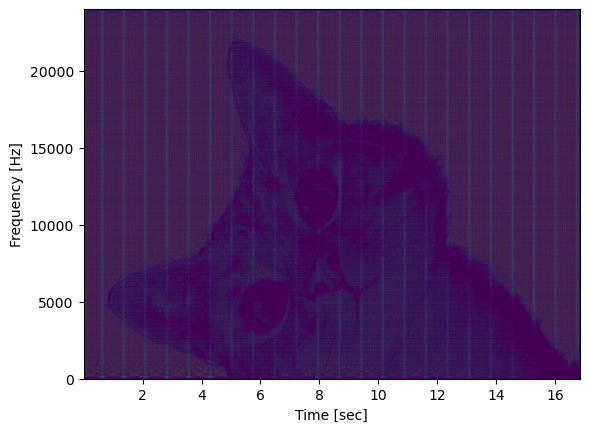

In [13]:
from scipy import signal
#from scipy.fft import fftshift
import matplotlib.pyplot as plt

fs = 48000
f, t, Sxx = signal.spectrogram(data[:], fs, noverlap=50, nfft=1024)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show() # it works

In [23]:
import numpy as np
from scipy.fftpack import fft

def getSpectrum(wav_data, frame, shift, fftl):
    len_sample, len_channel_vec = np.shape(wav_data)            
    dump_wav = wav_data.T
    dump_wav = dump_wav / np.max(np.abs(dump_wav)) * 0.7
    # window = sg.hanning(fftl + 1, 'periodic')[: - 1]   
    st = 0
    ed = frame
    number_of_frame = int((len_sample - frame) /  shift)
    spectrums = np.zeros((len_channel_vec, number_of_frame, int(fftl / 2) + 1), dtype=np.complex64)
    for ii in range(0, number_of_frame):       
        multi_signal_spectrum = fft(dump_wav[:, st:ed], n=fftl, axis=1)[:, 0:int(fftl / 2) + 1] # channel * number_of_bin        
        spectrums[:, ii, :] = multi_signal_spectrum
        st = st + shift
        ed = ed + shift
    return spectrums, len_sample

data1 = data.reshape(len(data),1)
complex_spectrum, _ = getSpectrum(data1, 512, 256, 512)
spect = complex_spectrum[0,:,:].T
print(spect.shape)
hann_window = signal.windows.hann(512)
f, t, Sxx = signal.spectrogram(data, 48000, window=hann_window, nperseg=512, noverlap=256, nfft=512, mode='complex')
print(Sxx.shape)

(257, 3154)
(257, 3155)


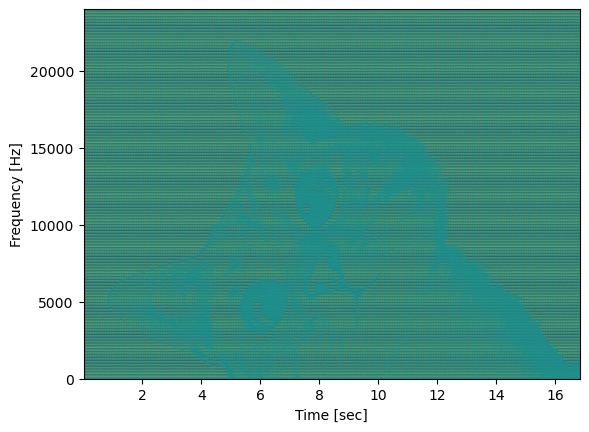

In [24]:
plt.pcolormesh(t, f, Sxx.real, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show() # it works

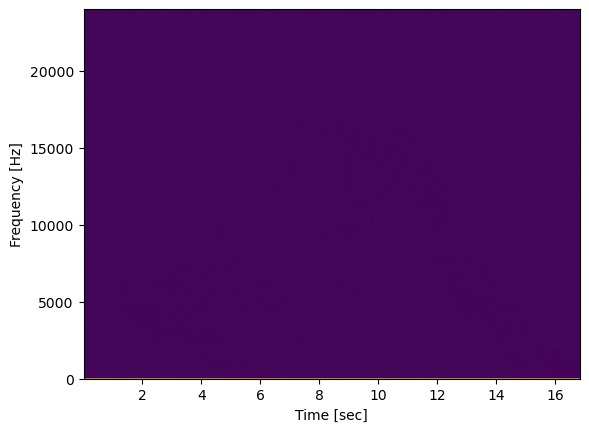

In [25]:
plt.pcolormesh(t[:-1], f, spect.real, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show() # it works